# **Crop Prediction using Machine Learning**

**Dataset Link:**  https://www.kaggle.com/code/theeyeschico/crop-analysis-and-prediction/data?select=Crop_recommendation.csv

* This Algorithm takes the nutrients present in the sample of soil, like amount of Nitrogen, Phosphorus and Potassium present in it.

* It also accounts for the pH value of the soil, the average rainfall and Humidity of the soil as well.

* After having all these information the model predicts which crop will be the best to grow on that particular area, and increase the yield.

* Farming and Agriculture is the leading sector and lot of farmers incur losses on their yields due to a lot of reasons and lack of knowledge, this model will solve those problems and help the farmers to have a great yield.

▪️The Algorithms used are Logistic Regression, Random Forest and Decision Tree Algorithm

▪️This Algorithm takes the nutrients present in the sample of soil, like amount of Nitrogen, Phosphorus and Potassium present in it.

▪️It also accounts for the pH value of the soil, the average rainfall and Humidity of the soil as well.

▪️After having all these information the model predicts which crop will be the best to grow on that particular area, and increase the yield.

▪️Farming and Agriculture is the leading sector and lot of farmers incur losses on their yields due to a lot of reasons and lack of knowledge, this model will solve those problems and help the farmers to have a great yield.

▪️Once the sample soil is tested and the nutrients are knowns, the model will be good to go.!!

**Classification Use Case**

In [1]:
# Import required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,precision_recall_curve,f1_score,classification_report

from sklearn.model_selection import GridSearchCV

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

In [2]:
data = pd.read_csv("/content/Crop_recommendation.csv")
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data.shape

(2200, 8)

In [4]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

**EDA**

In [7]:
data["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

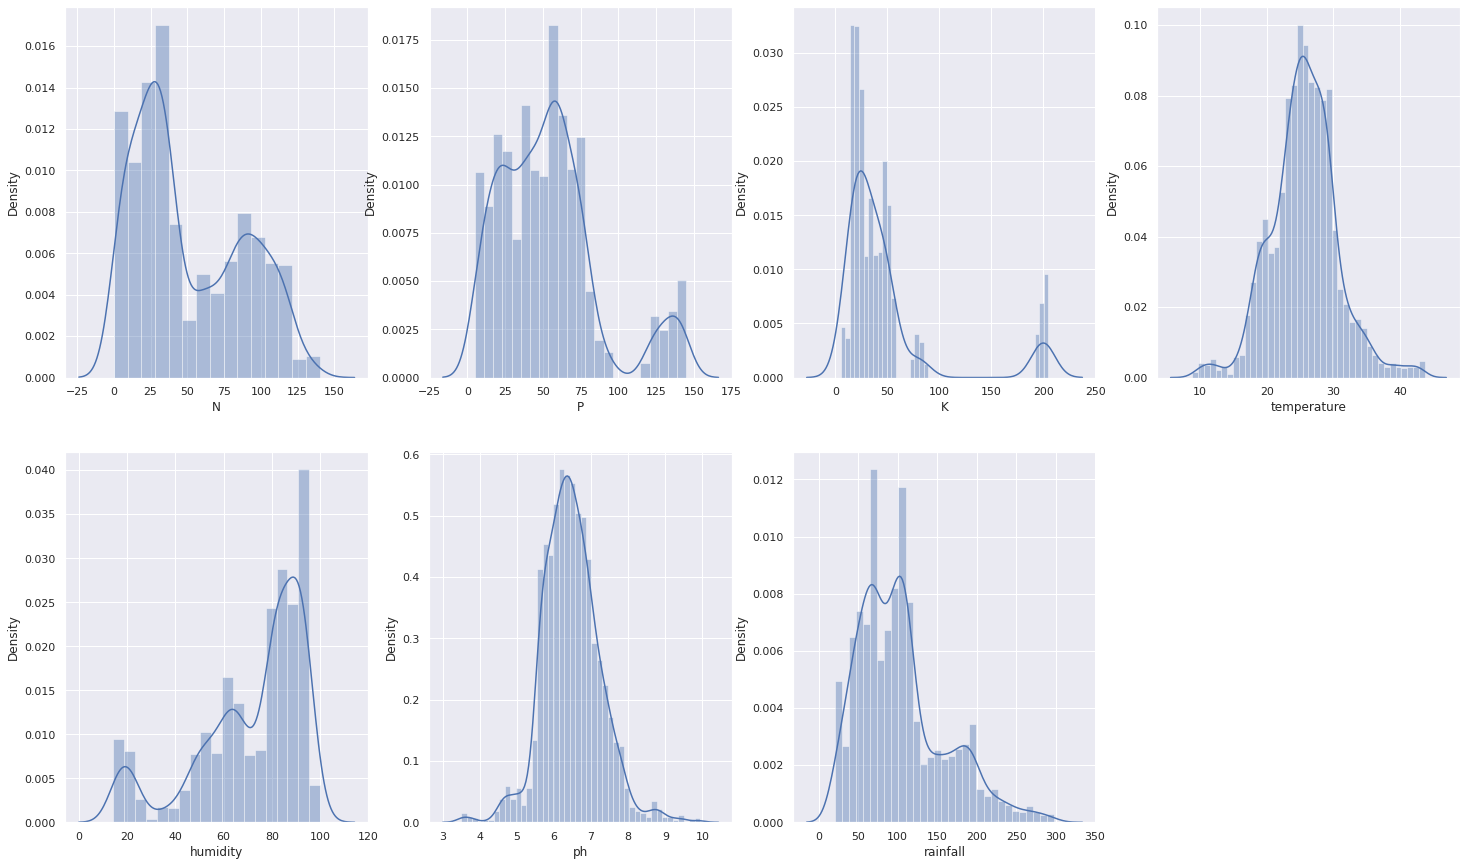

In [8]:
plt.figure(figsize=(25,15))
plotnumber = 1

for column in data.iloc[:,0:-1]:
  if plotnumber <= 8:
    ax = plt.subplot(2,4,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column)
  plotnumber+=1
plt.show()

In [9]:
data["label"].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

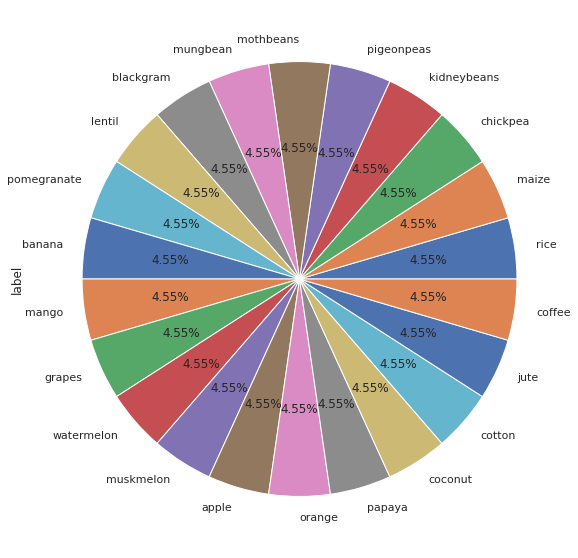

In [10]:
class_labels = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
plt.figure(figsize = (10,10))
data["label"].value_counts().plot(kind  = "pie",autopct = "%0.2f%%",labels = class_labels)
plt.show()

<AxesSubplot:>

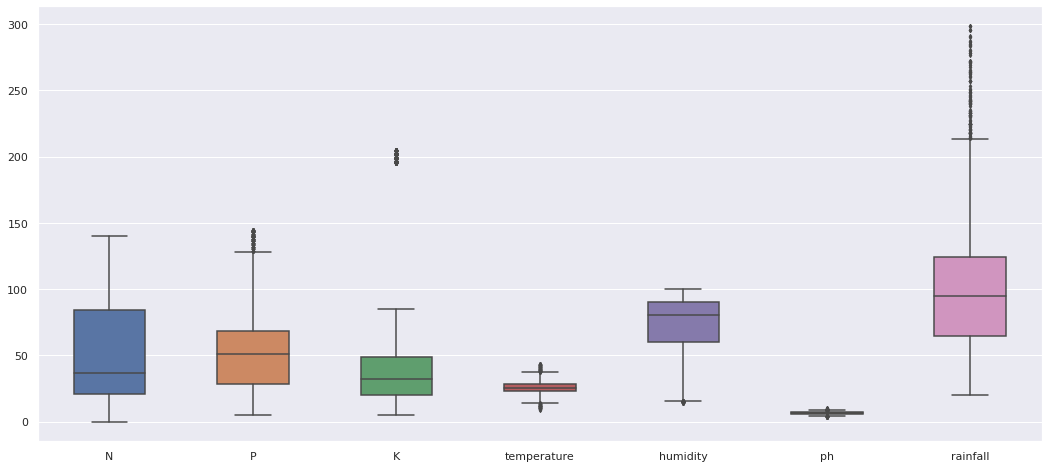

In [11]:
fig,ax = plt.subplots(figsize = (18,8))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

**Handling Outliers**

In [12]:
df2 = data.copy()

In [13]:
def outlier_remove_IQR(column):
 percentile_25 = df2[column].quantile(.25)
 percentile_75 = df2[column].quantile(.72)
 IQR = percentile_75 - percentile_25
 upper_lmt = percentile_75 + 1.5*IQR
 lower_lmt = percentile_25 - 1.5*IQR
 print('25 Percentile : ',percentile_25)
 print('75 percentile : ',percentile_75)
 print('Upper limit is : ',upper_lmt)
 print('Lower limit is : ',lower_lmt)
 print('IQR is : ',IQR)
 df2[column] = np.where(df2[column]>upper_lmt,upper_lmt,np.where(df2[column]<lower_lmt,lower_lmt,df2[column]))
 #return df2[df2[column] > upper_lmt]
 #return df2[df2[column]<lower_lmt]

In [14]:
def comparison_plot(data,df2,column):
 # Comparing data of before and after outlier handling
 plt.figure(figsize=(15,10))
 plt.subplot(2,2,1)
 sns.distplot(data[column])
 plt.subplot(2,2,2)
 sns.boxplot(data[column])
 plt.subplot(2,2,3)
 sns.distplot(df2[column])
 plt.subplot(2,2,4)
 sns.boxplot(df2[column])
 plt.show()

In [15]:
outlier_remove_IQR('K')

25 Percentile :  20.0
75 percentile :  47.0
Upper limit is :  87.5
Lower limit is :  -20.5
IQR is :  27.0


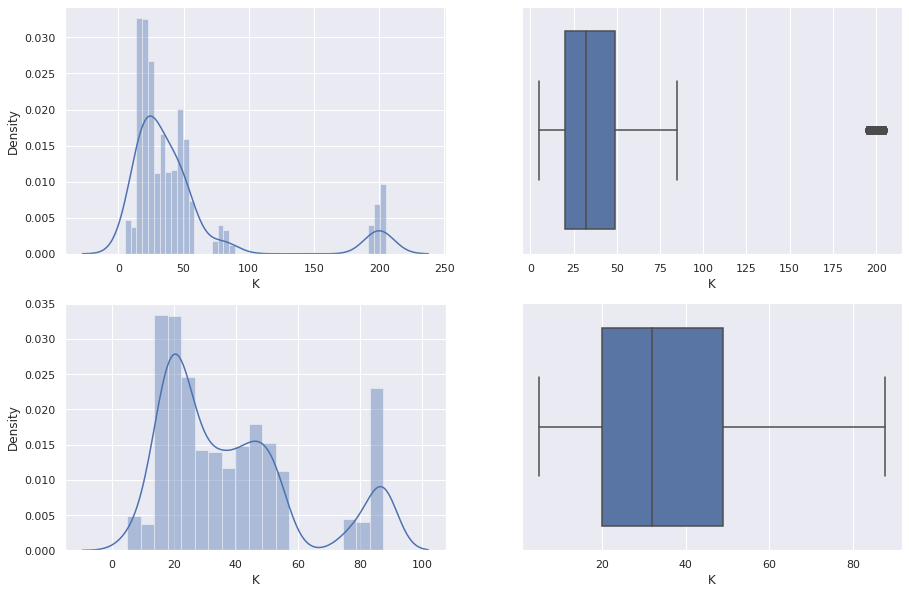

In [16]:
comparison_plot(data,df2,'K')

In [17]:
outlier_remove_IQR('rainfall')

25 Percentile :  64.55168599999999
75 percentile :  117.853457108
Upper limit is :  197.80611377000002
Lower limit is :  -15.40097066200002
IQR is :  53.30177110800001


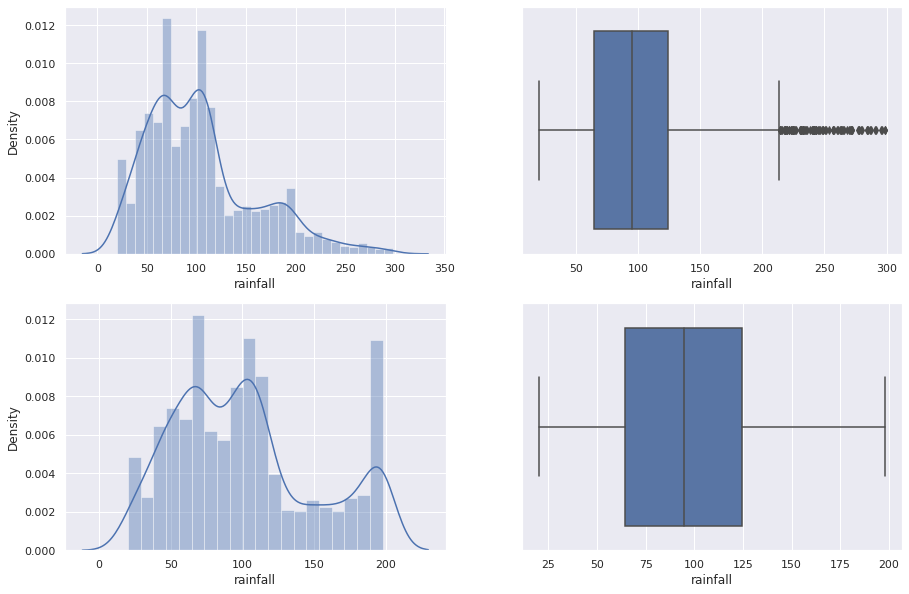

In [18]:
comparison_plot(data,df2,'rainfall')

<AxesSubplot:>

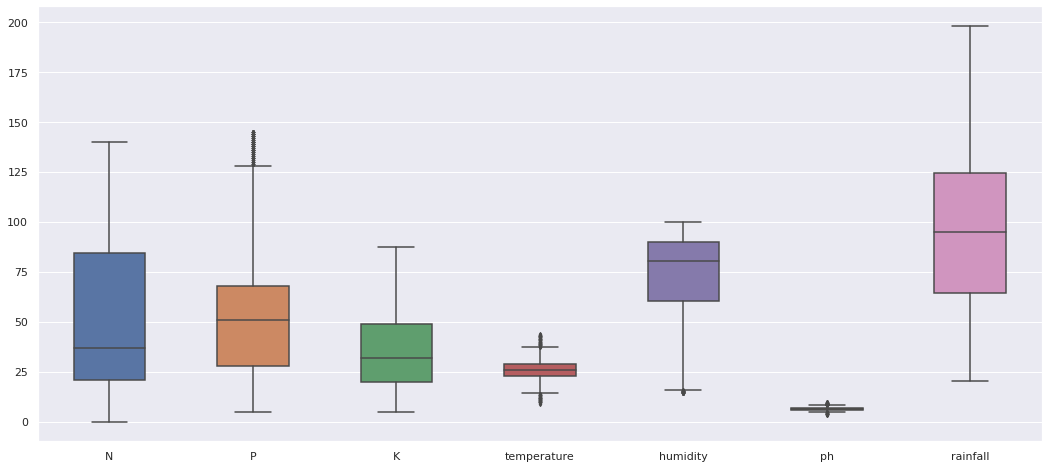

In [19]:
fig,ax = plt.subplots(figsize = (18,8))
sns.boxplot(data=df2,width = 0.5,fliersize = 3,ax=ax)

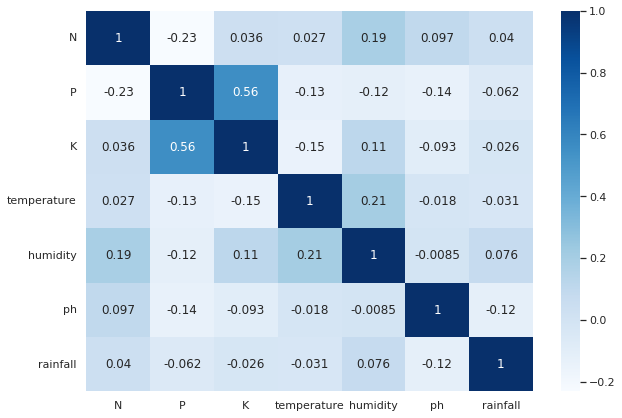

In [20]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,7))
sns.heatmap(df2.corr(), cmap='Blues',annot = True)
plt.show()

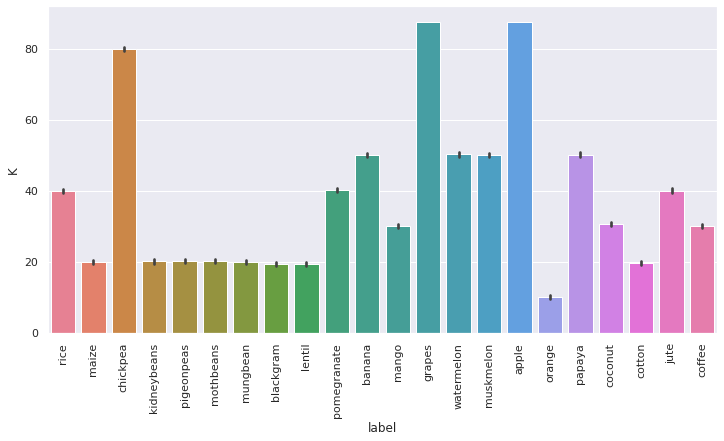

In [21]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'K', x = 'label', data=df2, palette = 'husl')
plt.xticks(rotation = 90)
plt.show()

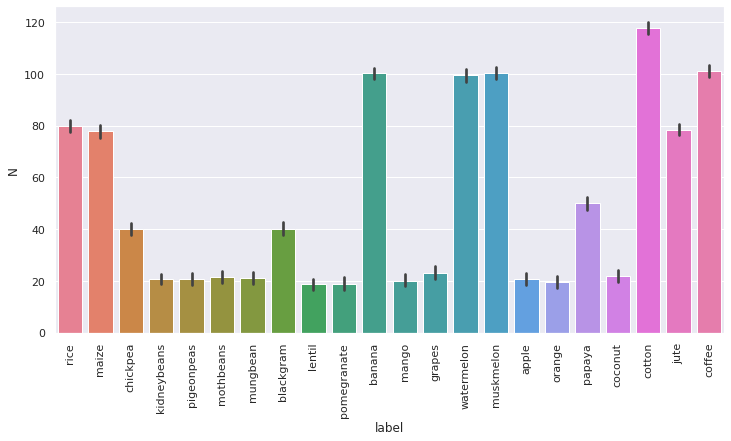

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'N', x = 'label', data=df2, palette = 'husl')
plt.xticks(rotation = 90)
plt.show()

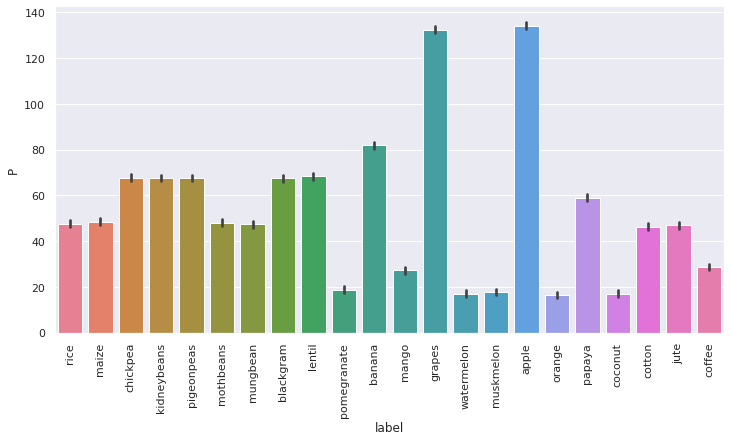

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'P', x = 'label', data=df2, palette = 'husl')
plt.xticks(rotation = 90)
plt.show()

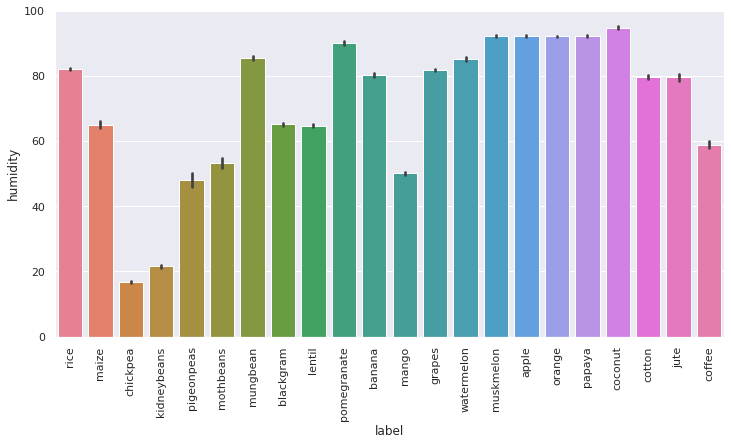

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(y = 'humidity', x = 'label', data=df2, palette = 'husl')
plt.xticks(rotation = 90)
plt.show()

In [25]:
df2.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43.0,20.879744,82.002744,6.502985,197.806114,rice
1,85,58,41.0,21.770462,80.319644,7.038096,197.806114,rice
2,60,55,44.0,23.004459,82.320763,7.840207,197.806114,rice
3,74,35,40.0,26.491096,80.158363,6.980401,197.806114,rice
4,78,42,42.0,20.130175,81.604873,7.628473,197.806114,rice


#### **Split Independent and Dependent Features**

In [26]:
X = df2.drop(columns = ["label"],axis = 1)
y = df2["label"]

In [28]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43.0,20.879744,82.002744,6.502985,197.806114
1,85,58,41.0,21.770462,80.319644,7.038096,197.806114
2,60,55,44.0,23.004459,82.320763,7.840207,197.806114
3,74,35,40.0,26.491096,80.158363,6.980401,197.806114
4,78,42,42.0,20.130175,81.604873,7.628473,197.806114


In [30]:
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

#### **Feature Scaling**

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_scaled

array([[ 1.0687974 , -0.34455075,  0.22642508, ...,  0.47266646,
         0.04330173,  1.95864019],
       [ 0.93332887,  0.14061552,  0.13724943, ...,  0.39705125,
         0.73487256,  1.95864019],
       [ 0.25598625,  0.04964684,  0.27101291, ...,  0.48695381,
         1.77151047,  1.95864019],
       ...,
       [ 1.82742114, -0.61745677, -0.35321665, ..., -0.19123516,
        -0.13812031,  1.46266644],
       [ 1.80032743, -0.64777967, -0.17486534, ..., -0.86951801,
         0.37390383,  0.52782536],
       [ 1.44810927, -1.07230015, -0.35321665, ..., -0.49802006,
         0.40109573,  0.80660612]])

**VIF**

In [33]:
variables = X_scaled

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Feature"] = X.columns

In [34]:
vif

,VIF,Feature
0,1.128779,N
1,1.657128,P
2,1.595282,K
3,1.081895,temperature
4,1.142994,humidity
5,1.045545,ph
6,1.029943,rainfall


#### **Splitting the data for training and Testing**

In [35]:
#split the data into training and testing

X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state = 10)

In [36]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (1760, 7)
Shape of X Test:  (440, 7)
Shape of y Train:  (1760,)
Shape of y Test:  (440,)


**Logistic Regression**

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred = logmodel.predict(X_test)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.96      0.96      0.96        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       0.83      0.79      0.81        19
 kidneybeans       0.96      1.00      0.98        22
      lentil       0.97      0.97      0.97        30
       maize       1.00      1.00      1.00        22
       mango       0.95      1.00      0.98        21
   mothbeans       0.94      0.83      0.88        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        18
      papaya       1.00    

**DecisionTree Algorithm**

In [49]:
deccls = DecisionTreeClassifier()
deccls.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred = deccls.predict(X_test)

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      0.96      0.98        27
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.68      0.81        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        30
       maize       0.96      1.00      0.98        22
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        18
      papaya       1.00    

**RandomForest Classifier**

In [54]:
rfcls = RandomForestClassifier()
rfcls.fit(X_train,y_train)

RandomForestClassifier()

In [55]:
y_pred = rfcls.predict(X_test)

In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        23
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        24
      coffee       1.00      1.00      1.00        24
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        15
        jute       1.00      0.95      0.97        19
 kidneybeans       1.00      1.00      1.00        22
      lentil       1.00      1.00      1.00        30
       maize       1.00      1.00      1.00        22
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      1.00      1.00        18
    mungbean       1.00      1.00      1.00        16
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        18
      papaya       1.00    